# Regression Logistica

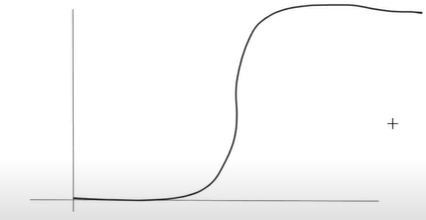

- Se basa en la regression lineal.
- En este caso la regression logistica es de clasificacion, mas especificamente es mejor para problemas binarios


In [21]:
import pandas as pd
from icecream import ic
import numpy as np
data = pd.read_csv("DATA\Social_Network_Ads.csv")
"""El objetivo es predecir si un cliente comprará o no un producto basado en su edad, salario y genero, es decir usaremos las columnas Gender, Age y EstimatedSalary como variables predictoras y la columna Purchased como variable objetivo."""

'El objetivo es predecir si un cliente comprará o no un producto basado en su edad, salario y genero, es decir usaremos las columnas Gender, Age y EstimatedSalary como variables predictoras y la columna Purchased como variable objetivo.'

In [5]:
data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


### Preparacion de Datos

In [19]:
X = data.iloc[:, [2, 3]] # La edad y el salario estimado
y = data.iloc[:, -1].values # La columna Purchased

In [20]:
#
#* Nos encargamos de la variable categorica Gender
gender = data[["Gender"]]

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(gender)

print(ic(cat_encoder.categories_))

ic| cat_encoder.categories_: [array(['Female', 'Male'], dtype=object)]


[array(['Female', 'Male'], dtype=object)]


In [ ]:
data_cat_1hot
data_cat_1hot.toarray()[:3] # Explicacion: El resultado es una matriz dispersa, por lo que se convierte a un array denso para visualizarlo mejor.

array([[0., 1.],
       [0., 1.],
       [1., 0.]])

In [ ]:
encoded_df = pd.DataFrame(data_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out()) # Explicacion: El resultado de la codificacion one hot es una matriz dispersa, por lo que tenemos que convertirla a un dataframe para poder visualizarla.
#* La matriz dispersa es una matriz que contiene muchos ceros, por lo que se almacena de forma eficiente en memoria.
encoded_df.head(3)

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0


In [31]:
data_1 = pd.concat([X, encoded_df], axis=1) # Concatenamos la matriz de edad y salario estimado con la matriz de codificacion one hot.
data_1.head(3)
ic(data_1.shape)

ic| data_1.shape: (400, 4)


(400, 4)

In [33]:
#
#* Separamos los datos en train y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_1, y, test_size=0.2, random_state=0) # Explicacion: Separamos los datos en train y test, el 80% de los datos se usan para entrenar el modelo y el 20% para probarlo.

In [34]:
ic(X_train.shape)
ic(X_test.shape)

ic| X_train.shape: (320, 4)
ic| X_test.shape: (80, 4)


(80, 4)

#### Escalado de Datos
Haremos esto debido a que hay mucha diferencia entre los valores de las columnas como edad, genero y dinero

In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # Explicacion: Se crea un objeto de la clase StandardScaler, que se encargara de estandarizar los datos.
X_train = sc_X.fit_transform(X_train) # Explicacion: Se ajusta el objeto StandardScaler a los datos de entrenamiento y se transforma los datos de entrenamiento.
X_test = sc_X.transform(X_test) # Explicacion: Se transforma los datos de prueba con el objeto StandardScaler ya ajustado a los datos de entrenamiento.

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0) # Explicacion: Se crea un objeto de la clase LogisticRegression, que se encargara de entrenar el modelo de regresion logistica.
log_reg.fit(X_train, y_train) # Explicacion: Se ajusta el objeto LogisticRegression a los datos de entrenamiento.

LogisticRegression(random_state=0)

In [ ]:

#* Prediccion de resultados
#* Se predicen los resultados de los datos de prueba con el modelo ya entrenado.
y_pred = log_reg.predict(X_test) # Explicacion: Se predicen los resultados de los datos de prueba con el modelo ya entrenado.
ic(y_pred[:20])
ic(y_test[:20]) # Explicacion: Se muestran los primeros 20 resultados de la prediccion y los primeros 20 resultados reales.

ic| y_pred[:20]: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                       dtype=int64)
ic| y_test[:20]: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                       dtype=int64)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [43]:
#
#* Matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred) # Explicacion: Se crea una matriz de confusión con los resultados reales y los resultados predichos.
ic(confusion_matrix)

ic| confusion_matrix: array([[56,  2],
                             [ 5, 17]], dtype=int64)


array([[56,  2],
       [ 5, 17]], dtype=int64)

In [47]:
#
#* Precision Score
from sklearn.metrics import precision_score, recall_score, f1_score
print(ic(precision_score(y_test, y_pred))) # Explicacion: Se calcula la precision del modelo, es decir, la cantidad de verdaderos positivos entre la cantidad de verdaderos positivos y falsos positivos.
print(ic(recall_score(y_test, y_pred))) # Explicacion: Se calcula el recall del modelo, es decir, la cantidad de verdaderos positivos entre la cantidad de verdaderos positivos y falsos negativos.
print(ic(f1_score(y_test, y_pred))) # Explicacion: Se calcula el f1 score del modelo, es decir, la media armonica entre la precision y el recall.

ic| precision_score(y_test, y_pred): 0.8947368421052632
ic| recall_score(y_test, y_pred): 0.7727272727272727
ic| f1_score(y_test, y_pred): 0.8292682926829269


0.8947368421052632
0.7727272727272727
0.8292682926829269
